# Entregável 1 - visão computacional

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.3.0 


# Equalização de histograma

In [2]:
rintin = cv2.imread("RinTinTin.jpg")

In [3]:
rintin.shape

(240, 320, 3)

In [4]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [5]:
rintin_gray.shape

(240, 320)

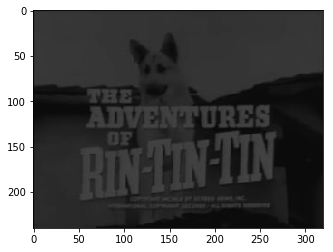

In [6]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

In [7]:
rintin_gray

array([[21, 39, 42, ..., 41, 41, 37],
       [22, 40, 44, ..., 42, 42, 37],
       [23, 41, 45, ..., 42, 43, 38],
       ..., 
       [14, 28, 35, ..., 18, 18, 17],
       [16, 29, 36, ..., 18, 17, 17],
       [18, 31, 38, ..., 18, 17, 17]], dtype=uint8)

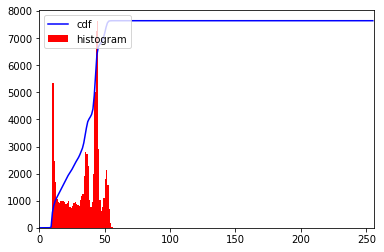

In [8]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

#### Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?


#### R- Não, pois o cdf mostra que as dimensões das cores da imagem vão até 250, enquanto o histogramase mantém até 50. Dessa forma, existem muitas faixas que não estão sendo aproveoitadas


2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico


In [9]:
rgmax= rintin_gray.max()
rgmin= rintin_gray.min()
def transforma(p):
    novopi= (p - rgmin)/rgmax *255
    return novopi

In [10]:
novo_rgray=[]

for x in rintin_gray:
    linha=[]
    for y in x:
        npix= transforma(y)
        linha.append(npix)
    novo_rgray.append(linha)

In [26]:
#novo_rgray

In [12]:
novo_arrayg=np.asarray(novo_rgray)

In [27]:
#novo_arrayg

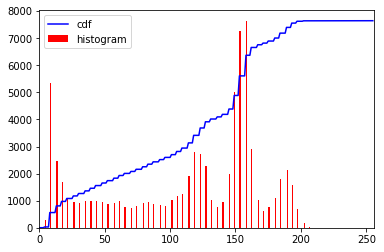

In [14]:
hist,bins = np.histogram(novo_arrayg.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(novo_arrayg.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


3. Plote a imagem desenhada

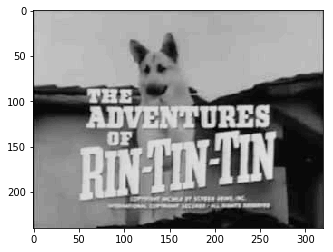

In [15]:
plt.imshow(novo_rgray, cmap="Greys_r", vmin=0, vmax=255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

In [16]:
ceb= cv2.imread("hall_box_battery1.jpg")

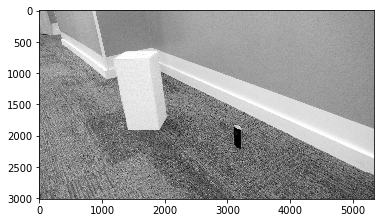

In [17]:
ceb_rgb = cv2.cvtColor(ceb, cv2.COLOR_BGR2RGB)
ceb_r = ceb_rgb[:,:,0]
plt.imshow(ceb_r, cmap='Greys_r')

In [30]:
canal_r = ceb[:,:,0]
canal_b = ceb[:,:,2]

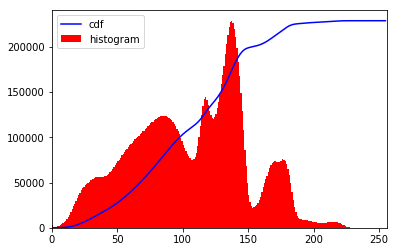

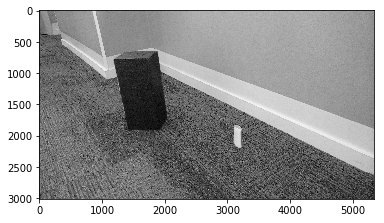

In [33]:
hist,bins = np.histogram(canal_r.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(canal_r.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
plt.imshow(canal_r, cmap= "Greys_r")

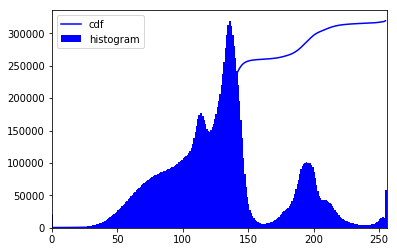

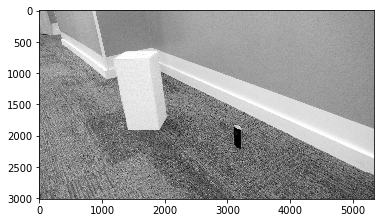

In [34]:
hist,bins = np.histogram(canal_b.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(canal_b.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
plt.imshow(canal_b, cmap= "Greys_r")

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

R- A partir dos canais  R e B e seus  histogramas é possível identificar a caixa vermelha e a bateria azul. Isso se deve pela grande quantidade de pixel de coloracão azul e vermellha em determinada faixa.

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui

In [24]:
#180, 42, 53 -- frente caixa
#162,64,49 -- lado caixa
#219,115,85 -- cima caixa
novo_ceb=[]
for x in ceb_rgb:
    lista=[]
    for linha in x:
        if linha[0] > 162 and linha[1] <115 and linha[2]<85:
            z=[255,255,255]
            lista.append(z) 
        else:
            lista.append(linha)
    
    novo_ceb.append(lista)

    

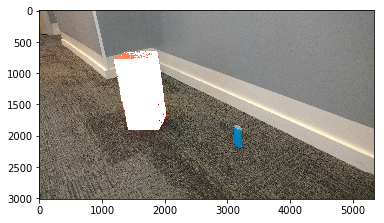

In [25]:
novo_ceb = np.asarray(novo_ceb)
novo_ceb = novo_ceb.astype(np.uint8)

plt.imshow(novo_ceb)